In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\LENOVO\Desktop\Newfolder\project3\household_power_consumption_data.txt"
df = pd.read_csv(file_path, sep=';', low_memory=False, na_values='?')

# Save to CSV
csv_path = r"C:\Users\LENOVO\Desktop\Newfolder\project3\household_power_consumption_data.csv"
df.to_csv(csv_path, index=False)
print("File saved as CSV.")


File saved as CSV.


In [3]:
# Reload from CSV
df = pd.read_csv(csv_path, low_memory=False)

# Combine Date and Time into single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H:%M:%S", errors='coerce')
df.drop(columns=['Date', 'Time'], inplace=True)

# Drop rows with missing values

df.dropna(inplace=True)


 #List of numeric columns to convert
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Convert to float
df[numeric_cols] = df[numeric_cols].astype(float)

# Set datetime as index

df.dropna(inplace=True)

df = df.drop(columns=['Datetime'])


# Set features (all columns except the target)
X = df.drop(columns=['Global_active_power'])

# Set target (what we want to predict)
y = df['Global_active_power']




print(X.head())   # first 5 rows of features

   Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                  0.418   234.84              18.4             0.0   
1                  0.436   233.63              23.0             0.0   
2                  0.498   233.29              23.0             0.0   
3                  0.502   233.74              23.0             0.0   
4                  0.528   235.68              15.8             0.0   

   Sub_metering_2  Sub_metering_3  
0             1.0            17.0  
1             1.0            16.0  
2             2.0            17.0  
3             1.0            17.0  
4             1.0            17.0  


In [32]:
print(df.columns)


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [33]:
print(df.head())   # shows first 5 rows by default


   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             0.0             1.0            17.0  
1             0.0             1.0            16.0  
2             0.0             2.0            17.0  
3             0.0             1.0            17.0  
4             0.0             1.0            17.0  


In [4]:
print(y.head()) 

0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64


In [5]:
print(X.shape)    # (rows, columns) what is to check
print(y.shape)

(2049280, 6)
(2049280,)


In [6]:

print(df.shape)  # Number of rows and columns

(2049280, 7)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB
None


In [8]:
print(df.dtypes)

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [9]:
print(df.isnull().sum())  # Check for missing values in each column

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [10]:
print(df.describe())

       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00   

<Figure size 1000x600 with 0 Axes>

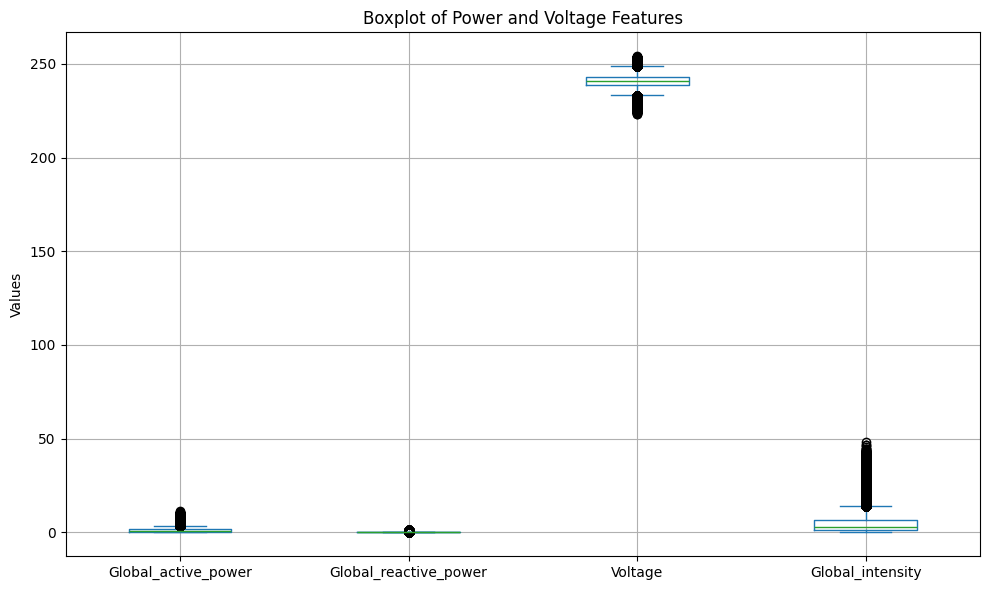

In [19]:
import matplotlib.pyplot as plt

# Select numeric columns
columns_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Plot using pandas built-in boxplot
plt.figure(figsize=(10, 6))
df[columns_to_plot].plot(kind='box', figsize=(10, 6), grid=True)
plt.title('Boxplot of Power and Voltage Features')
plt.ylabel('Values')
plt.tight_layout()
plt.show()


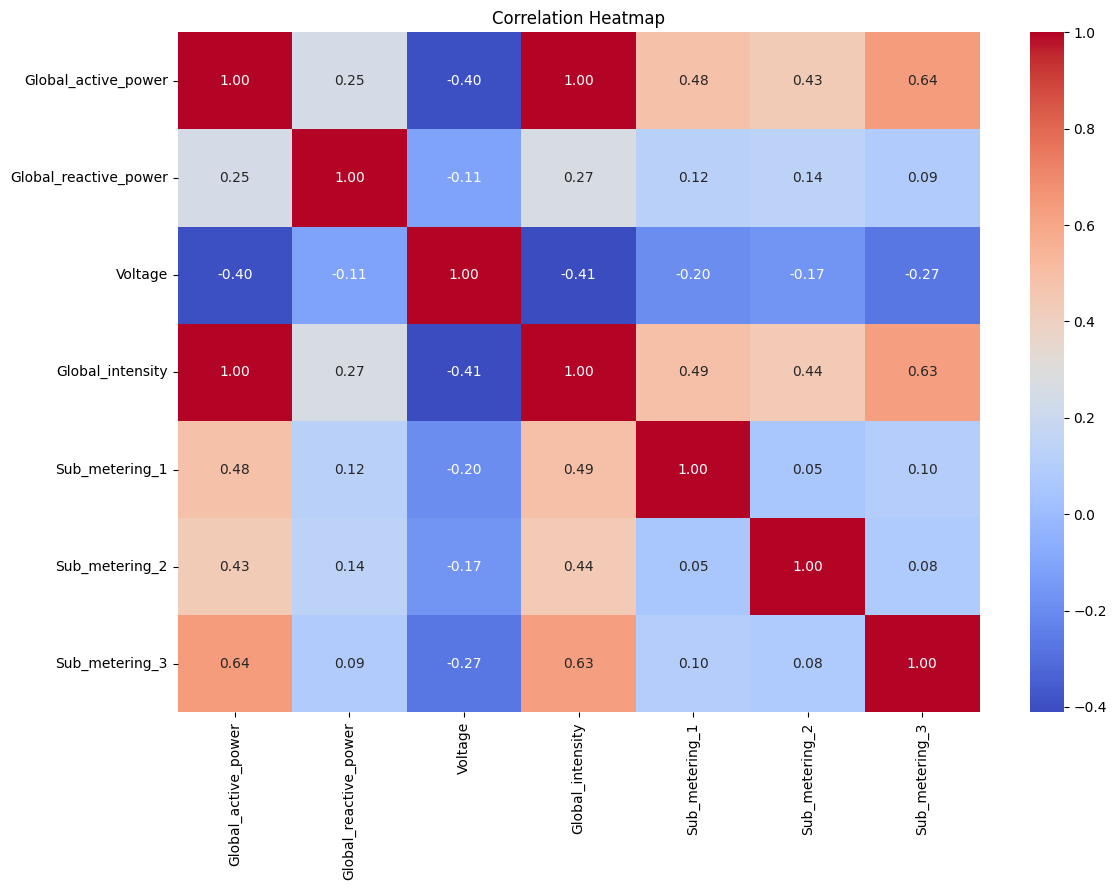

In [18]:
# Step 7: Correlation heatmap (only numeric columns)
df_numeric = df.select_dtypes(include='number').dropna()
plt.figure(figsize=(12, 9))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [14]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ------------- -------------------------- 3.7/10.7 MB 18.2 MB/s eta 0:00:01
   ------------------------------ --------- 8.1/10.7 MB 20.2 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 18.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---- ----------------------------------- 4.7/41.0 MB 23.8 MB/s eta 0:00:02
   --------- ------------------------------ 9.4/41.0 MB 23.5 MB/s eta 0:00:02
   ------------- -------------------------- 13.9/41.0 MB 23.0 MB/s eta 0:00:02
   ----------------- ---------------------- 18.4/41.0 MB 22.7 MB/s eta 0:00:01
   --------------------- ------------------ 22.0/41.0 MB 21.4 MB/s eta 0:00:01
   -------------------------- ------------- 27.5/41.0 MB 22.4 MB/s eta 0:00:01
   ------------------------------- -------- 32.2/41.0 MB 22.3 MB/s eta 0:00:01
   ------------------------------------ --- 37.0/41.0 MB 22.4 MB/s eta 0:0


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

#  Initialize the Linear Regression model
linear_model = LinearRegression()

#  Train the model on the training dataset
linear_model.fit(X_train, y_train)

#  Display model coefficients and intercept
print("Model Coefficients (slopes for each feature):", linear_model.coef_)
print("Model Intercept (bias term):", linear_model.intercept_)

#  Predict on test data
y_pred = linear_model.predict(X_test)

#  Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#  Print all metrics with explanation
print("\nLinear Regression Model Evaluation Metrics:")
print(f"R-squared (R²): {r2:.6f} — How well the model explains the variance.")
print(f"Mean Absolute Error (MAE): {mae:.6f} — Average absolute difference between prediction and actual.")  # it will print only 6 decimal 
print(f"Mean Squared Error (MSE): {mse:.6f} — Penalizes larger errors more.")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f} — Standard deviation of prediction error.")


Model Coefficients (slopes for each feature): [-0.17578678  0.0044532   0.23803781 -0.00032879 -0.00044213  0.00217587]
Model Intercept (bias term): -1.0738468853039653

Linear Regression Model Evaluation Metrics:
R-squared (R²): 0.998550 — How well the model explains the variance.
Mean Absolute Error (MAE): 0.025839 — Average absolute difference between prediction and actual.
Mean Squared Error (MSE): 0.001630 — Penalizes larger errors more.
Root Mean Squared Error (RMSE): 0.040368 — Standard deviation of prediction error.


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Create and configure the Random Forest Regressor
random_forest = RandomForestRegressor(
    n_estimators=50,   # Number of trees in the forest
    random_state=42,   # For reproducibility
    n_jobs=-1          # Use all available cores
)

# Step 2: Fit the model to training data
random_forest.fit(X_train, y_train)

# Step 3: Predict the target values for test set
rf_predictions = random_forest.predict(X_test)

# Step 4: Calculate evaluation metrics
r2_rf = r2_score(y_test, rf_predictions)
mae_rf = mean_absolute_error(y_test, rf_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mse_rf)

# Step 5: Display evaluation results

print(f"Random Forest Regressor Performance:")
print(f" R² Score: {r2_rf}")
print(f" MAE (Mean Absolute Error): {mae_rf}")
print(f" MSE (Mean Squared Error): {mse_rf}")
print(f" RMSE (Root Mean Squared Error): {rmse_rf}")


Random Forest Regressor Performance:
 R² Score: 0.9990460990553214
 MAE (Mean Absolute Error): 0.018627110692698793
 MSE (Mean Squared Error): 0.0010721307491596914
 RMSE (Root Mean Squared Error): 0.03274340772063426


In [ ]:
from sklearn.model_selection import GridSearchCV   # hyperparameter tunning teechnique use to find best combination fr mach lrning,to improve performance

# Step 1: Define the parameter grid to search   
param_options = {
    'n_estimators': [50, 100, 150],  #no of trees in the forest
    'max_depth': [None, 10, 20],   #max depth of each tree
    'min_samples_split': [2, 5],    #mini samples to split internal node
    'min_samples_leaf': [1, 2]   #mini sample required at leaf node
}

# Step 2: Initialize GridSearchCV with the Random Forest Regressor
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_options,
    cv=3,                                  # cv=3 ,cross validation,dataset split into 3 parts 2 part fr training and 1 fr test and this happns 3 timeswith diff data set,helps to prevnt overfitting and gvs more reliable score
    scoring='neg_mean_squared_error', # evalute the model performance,#aftr  grid search may multiply the result  by -1 to get the real value of mse
    n_jobs=-1,                         #it  tell scikit to use all available cpu score to use ,to run thetraining evaluton of diff paramtr to make it faster
    verbose=1                   #while grid search is running we can see the output,0  na no outpt,1 na show progress for each fit,2 na more detailed info for every fold
)

# Step 3: Fit the grid search to the training data
rf_grid_search.fit(X_train, y_train)

# Step 4: Extract the best model from the grid search
optimized_rf_model = rf_grid_search.best_estimator_

# Optional: Display the best parameters
print("\n Best Parameters Found:", rf_grid_search.best_params_)   #65 minutes run 




#output :Fitting 3 folds for each of 36 candidates, totalling 108 fits   #65 minutes run &105mint


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train model
gb_model = GradientBoostingRegressor(n_estimators=50)
gb_model.fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("\nGradient Boosting Model Evaluation:")
print(f"R² Score: {r2:.10f}")
print(f"Mean Absolute Error (MAE): {mae:}")
print(f"Mean Squared Error (MSE): {mse:}")
print(f"Root Mean Squared Error (RMSE): {rmse:}")



Gradient Boosting Model Evaluation:
R² Score: 0.9984765944
Mean Absolute Error (MAE): 0.026545717318895067
Mean Squared Error (MSE): 0.0017122217671214825
Root Mean Squared Error (RMSE): 0.04137900152397932


In [36]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define and train the MLP model
nn_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions on the test set
y_nn_pred = nn_model.predict(X_test)

# Calculate performance metrics
r2_nn = r2_score(y_test, y_nn_pred)
mae_nn = mean_absolute_error(y_test, y_nn_pred)
mse_nn = mean_squared_error(y_test, y_nn_pred)
rmse_nn = np.sqrt(mse_nn)

# Display the results
print("\nNeural Network (MLPRegressor) Model Evaluation:")
print(f"R² Score: {r2_nn:}")
print(f"Mean Absolute Error: {mae_nn:}")
print(f"Mean Squared Error: {mse_nn:}")
print(f"Root Mean Squared Error: {rmse_nn:}")



Neural Network (MLPRegressor) Model Evaluation:
R² Score: 0.99841449065525
Mean Absolute Error: 0.030211403450186438
Mean Squared Error: 0.0017820228935398633
Root Mean Squared Error: 0.042214012999712114
